In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
import math

In [2]:
# Function to set appropriate figure size for publication
# Width @516pts is for IEEE conference format
def set_size(width=516, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
# Import dataset and labels from pickle
def return_data(sim_length, bin_size):
    PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/histogram_classifier/"
    DATA_NAME = str(sim_length) + "ms - " + str(bin_size) + "ms bin size dataset.pickle"

    # Import dataset first
    FILENAME = PATH + DATA_NAME

    # Create array of intensities for heatmap
    with(open(FILENAME, "rb")) as openfile:
        try:
            dataset = pickle.load(openfile)
        except EOFError:
            print(EOFError)
            
    # WARNING: Dataset created from previous script contains a NULL row 0
    #          This row has currently been deleted and saved over the initial dataset
    #          Note for next time is to fix this bug
    if len(dataset) == (trials * textures)+1:
        dataset = np.delete(dataset, 0, 0)
            
    return dataset

In [4]:
# Data params
textures = 11
trials = 100

# Set bin and sim params
#bin_size = 250   # Bin size in ms
sim_length = 5000   # Sim time in ms
#bins = math.ceil(sim_length / bin_size)

In [5]:
# Import labels for dataset
PATH = "/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/datasets/TacTip_NM/histogram_classifier/"
LABEL_NAME = str(textures) + " textures - " + str(trials) + " trials labels.pickle"
# Now import label array
FILENAME = PATH + LABEL_NAME

with(open(FILENAME, "rb")) as openfile:
    try:
        labels = pickle.load(openfile)
    except EOFError:
        print(EOFError)

In [6]:
# This is now handled in a function above

# WARNING: Dataset created from previous script contains a NULL row 0
#          This row has currently been deleted and saved over the initial dataset
#          Note for next time is to fix this bug
#print(dataset[0])
#dataset = np.delete(dataset, 0, 0)
#print(len(dataset))
# if len(dataset) == 1101:
#     dataset = np.delete(dataset, 0, 0)
    
# Split data into testing and training
# Ration currently 80-20
#x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [7]:
# Create kfold validation model
kf = KFold(n_splits=10, random_state=63, shuffle=True)

In [8]:
# Use sklearn accuracy metrics to asses

#max_d = 50
bin_size = 100

train_accuracies = [] #[[] for _ in range(len(bin_sizes))]
val_accuracies = [] #[[] for _ in range(len(bin_sizes))]
avg_train = []
avg_val = []

# Total confusion arrays
Y_true = []
Y_Pred = []

clf = MLPClassifier(hidden_layer_sizes=40)
#index = 0

print("Currently handling bin size of : " + str(bin_size))
x_train, x_test, y_train, y_test = train_test_split(return_data(sim_length, bin_size), labels, test_size=0.2)
    
x_train = np.array(x_train)
y_train = np.array(y_train)
    
# Loop through each of the folds within the kfold
for train_index, val_index in kf.split(x_train):
    # Create folded data
    Xtrain, Xval = x_train[train_index], x_train[val_index]
    ytrain, yval = y_train[train_index], y_train[val_index]
        
    # Fit the model to the new folded training data
    clf.fit(Xtrain, ytrain)

    # Precit value using KNN
    #y_pred = knn.predict(x_test)
    pred_train = clf.predict(Xtrain)
    pred_val = clf.predict(Xval)
        
    # Append values to seperate array for confusion matrix
    Y_true.append(yval)
    Y_Pred.append(pred_val)

        #Calculate the accuracy of the predictions on the training set 
        #and save in the variable train_accuracies
    train_accuracies.append(accuracy_score(ytrain, pred_train))
        #train_accuracies[n].append(recall_score(ytrain, pred_train, average='micro'))
        #train_accuracies[n].append(precision_score(ytrain, pred_train, average='micro'))
        
        #Do the same for the predictions on the validation set
    val_accuracies.append(accuracy_score(yval, pred_val))
        #val_accuracies[n].append(recall_score(yval, pred_val, average='micro'))
        #val_accuracies[n].append(precision_score(yval, pred_val, average='micro'))
        
    #index = index + 1
    
#     print(np.mean(train_accuracies))
#     print(np.mean(val_accuracies))
avg_train.append(np.mean(train_accuracies))
avg_val.append(np.mean(val_accuracies))
    
train_accuraices = []
val_accuracies = []

Currently handling bin size of : 100


/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/farscope2/anaconda3/envs/spiking/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

In [9]:
#Calculate the mean for training and validation accuracies
#print(train_accuracies)
# print(avg_train)
print(avg_val)
#train_accuracy_mean = np.mean(train_accuracies, axis=1)
#val_accuracy_mean = np.mean(val_accuracies, axis=1)

[0.8204545454545453]


In [10]:
# print(np.mean(train_accuracy_mean))
# print(np.mean(val_accuracy_mean))
# print(np.max(val_accuracies))
#print(val_accuracies)

In [11]:
# # Plot this data
# x = np.linspace(0, max_d, max_d)

# fig, ax = plt.subplots(figsize=(12,8))

# ax.plot(x, train_accuracy_mean, color='r',label='Training Accuracy Mean')
# ax.plot(x, val_accuracy_mean, color='b',label='Validation Accuracy Mean')
# plt.xlabel("Size of hidden layers")
# plt.ylabel("Accuracy (%)")
# plt.title("Accuracy of Neural Net for " + DATA_NAME)
# plt.savefig("/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/neural_results/" +
#                     DATA_NAME + ".png")
# ax.legend()
# #plt.xticks(np.arange(0,max_d,1))
# plt.show()

In [12]:
SAVE_PATH = '/home/farscope2/Documents/PhD/Spiking Nets Project/SpikingNetsTexture/graphs/paper_confusion/'

Y_true = [item for sublist in Y_true for item in sublist]
#print(Y_true)
Y_Pred = [item for sublist in Y_Pred for item in sublist]

In [13]:
cnf_matrix = confusion_matrix(Y_true, Y_Pred, normalize='true')

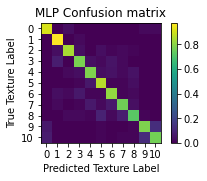

array([[0.91566265, 0.        , 0.03614458, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02409639,
        0.02409639],
       [0.        , 0.97368421, 0.        , 0.02631579, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.03529412, 0.84705882, 0.03529412, 0.        ,
        0.03529412, 0.01176471, 0.02352941, 0.01176471, 0.        ,
        0.        ],
       [0.        , 0.07894737, 0.        , 0.77631579, 0.03947368,
        0.02631579, 0.05263158, 0.02631579, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02380952, 0.03571429, 0.78571429,
        0.03571429, 0.04761905, 0.02380952, 0.04761905, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.01234568, 0.0617284 ,
        0.86419753, 0.01234568, 0.01234568, 0.03703704, 0.        ,
        0.        ],
       [0.        , 0.03658537, 0.02439024, 0.06097561, 0.

In [14]:
plt.figure(figsize=set_size(fraction=0.5))
plt.xticks(range(11))
plt.yticks(range(11))
plt.imshow(cnf_matrix)
plt.title('MLP Confusion matrix')
plt.xlabel("Predicted Texture Label")
plt.ylabel("True Texture Label")
plt.colorbar()
plt.savefig(SAVE_PATH + "MLP" + str(sim_length) + "ms - " + str(bin_size) + "ms bin size dataset.eps",bbox_inches="tight")
plt.show()
cnf_matrix

In [15]:
# norm = np.linalg.norm(cnf_matrix)
# normal_cnf = cnf_matrix/norm

# plt.figure(figsize=(6, 6))
# plt.xticks(range(11))
# plt.yticks(range(11))
# plt.imshow(normal_cnf)
# plt.title('Normalised Confusion matrix')
# plt.savefig(SAVE_PATH + DATA_NAME + " NN normalised confusion.png")
# plt.show()
# normal_cnf